<a href="https://colab.research.google.com/github/dilsousa/DataScience/blob/main/Dil_DesafioInferencia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importar as bibliotecas que precisamos

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

##Nesse caso, armazenei os *dataset's* no meu drive, por isso chamei eles assim

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Aqui apenas criei um objeto no python para armazenar os *dataset's*.

In [ ]:
demo = pd.read_csv('/content/drive/My Drive/Tera/Datasets/DEMO_PHQ.csv')
pag_hei = pd.read_csv('/content/drive/My Drive/Tera/Datasets/PAG_HEI.csv')

## Verificando os *dataset's*...

In [ ]:
demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5334 entries, 0 to 5333
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      5334 non-null   int64  
 1   DPQ010    4836 non-null   float64
 2   DPQ020    4836 non-null   float64
 3   DPQ030    4836 non-null   float64
 4   DPQ040    4836 non-null   float64
 5   DPQ050    4836 non-null   float64
 6   DPQ060    4836 non-null   float64
 7   DPQ070    4836 non-null   float64
 8   DPQ080    4836 non-null   float64
 9   DPQ090    4836 non-null   float64
 10  RIAGENDR  5334 non-null   int64  
 11  RIDAGEYR  5334 non-null   int64  
 12  RIDRETH1  5334 non-null   int64  
 13  DMDEDUC   5334 non-null   int64  
 14  INDFMINC  5287 non-null   float64
dtypes: float64(10), int64(5)
memory usage: 625.2 KB


In [ ]:
pag_hei.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9424 entries, 0 to 9423
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SEQN                      9424 non-null   int64  
 1   PAG_MINW                  7150 non-null   float64
 2   ADHERENCE                 7150 non-null   float64
 3   HEI2015C1_TOTALVEG        8549 non-null   float64
 4   HEI2015C2_GREEN_AND_BEAN  8549 non-null   float64
 5   HEI2015C3_TOTALFRUIT      8549 non-null   float64
 6   HEI2015C4_WHOLEFRUIT      8549 non-null   float64
 7   HEI2015C5_WHOLEGRAIN      8549 non-null   float64
 8   HEI2015C6_TOTALDAIRY      8549 non-null   float64
 9   HEI2015C7_TOTPROT         8549 non-null   float64
 10  HEI2015C8_SEAPLANT_PROT   8549 non-null   float64
 11  HEI2015C9_FATTYACID       8549 non-null   float64
 12  HEI2015C10_SODIUM         8549 non-null   float64
 13  HEI2015C11_REFINEDGRAIN   8549 non-null   float64
 14  HEI2015C

##Nessa análise foi definido que o banco "demo" será o principal e o "pag_hei" deve se juntar a ele.
##Para tanto, o comando abaixo mescla os dois bancos pela esquerda. O "demo" está na esquerda então o "pag_hei" deve se juntar a ele.

In [ ]:
db = demo.merge(pag_hei, on = 'SEQN', how = 'left')
db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5334 entries, 0 to 5333
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SEQN                      5334 non-null   int64  
 1   DPQ010                    4836 non-null   float64
 2   DPQ020                    4836 non-null   float64
 3   DPQ030                    4836 non-null   float64
 4   DPQ040                    4836 non-null   float64
 5   DPQ050                    4836 non-null   float64
 6   DPQ060                    4836 non-null   float64
 7   DPQ070                    4836 non-null   float64
 8   DPQ080                    4836 non-null   float64
 9   DPQ090                    4836 non-null   float64
 10  RIAGENDR                  5334 non-null   int64  
 11  RIDAGEYR                  5334 non-null   int64  
 12  RIDRETH1                  5334 non-null   int64  
 13  DMDEDUC                   5334 non-null   int64  
 14  INDFMINC

In [ ]:
db.head()

,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,...,HEI2015C5_WHOLEGRAIN,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE
0,31130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,31131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,3.141062,4.071959,2.052399,0.684985,2.297100,9.512964,0.438428,3.919226,35.553899
2,31132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.000000,4.448512,5.000000,0.000000,2.050769,7.369489,8.887880,8.186877,9.099088,63.551696
3,31134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.217331,2.313900,5.000000,1.268648,2.958985,0.000000,5.627488,5.863078,5.878686,42.886826
4,31139,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,...,0.211544,0.000000,4.088849,4.221442,10.000000,2.845774,0.000000,10.000000,9.658507,47.074393


##Nesse comando observa-se a quantidade de faltantes do banco, alguns sairam com 9,34% outros 5,14%. Deve-se avaliar se os dados faltantes são prejudiciais para a análise. Nesse momento foi decidido que os dados faltantes não representam problemas para os resultados.

In [ ]:
db.isnull().mean().round(4)*100

SEQN                        0.00
DPQ010                      9.34
DPQ020                      9.34
DPQ030                      9.34
DPQ040                      9.34
DPQ050                      9.34
DPQ060                      9.34
DPQ070                      9.34
DPQ080                      9.34
DPQ090                      9.34
RIAGENDR                    0.00
RIDAGEYR                    0.00
RIDRETH1                    0.00
DMDEDUC                     0.00
INDFMINC                    0.88
PAG_MINW                    0.00
ADHERENCE                   0.00
HEI2015C1_TOTALVEG          5.14
HEI2015C2_GREEN_AND_BEAN    5.14
HEI2015C3_TOTALFRUIT        5.14
HEI2015C4_WHOLEFRUIT        5.14
HEI2015C5_WHOLEGRAIN        5.14
HEI2015C6_TOTALDAIRY        5.14
HEI2015C7_TOTPROT           5.14
HEI2015C8_SEAPLANT_PROT     5.14
HEI2015C9_FATTYACID         5.14
HEI2015C10_SODIUM           5.14
HEI2015C11_REFINEDGRAIN     5.14
HEI2015C12_SFAT             5.14
HEI2015C13_ADDSUG           5.14
HEI2015_TO

## A mesma análise agora em números e não porcentagem

In [ ]:
db.isna().sum()

SEQN                          0
DPQ010                      498
DPQ020                      498
DPQ030                      498
DPQ040                      498
DPQ050                      498
DPQ060                      498
DPQ070                      498
DPQ080                      498
DPQ090                      498
RIAGENDR                      0
RIDAGEYR                      0
RIDRETH1                      0
DMDEDUC                       0
INDFMINC                     47
PAG_MINW                      0
ADHERENCE                     0
HEI2015C1_TOTALVEG          274
HEI2015C2_GREEN_AND_BEAN    274
HEI2015C3_TOTALFRUIT        274
HEI2015C4_WHOLEFRUIT        274
HEI2015C5_WHOLEGRAIN        274
HEI2015C6_TOTALDAIRY        274
HEI2015C7_TOTPROT           274
HEI2015C8_SEAPLANT_PROT     274
HEI2015C9_FATTYACID         274
HEI2015C10_SODIUM           274
HEI2015C11_REFINEDGRAIN     274
HEI2015C12_SFAT             274
HEI2015C13_ADDSUG           274
HEI2015_TOTAL_SCORE         274
dtype: i

## Nesse passo o comando 'DROP' excluiu apenas nessa linha a coluna SEQN e descreve o comportamento das demais...
##Ex: Qual é o .99 percentil da coluna DPQ010? A resposta é 3, significando que 99% das pessoas têm 3 ou menos.


In [ ]:
db.drop(columns = ['SEQN']).describe(percentiles = [.25, .5, .75, .95, .99]).round(2)

,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,RIAGENDR,...,HEI2015C5_WHOLEGRAIN,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE
count,4836.00,4836.00,4836.00,4836.00,4836.00,4836.00,4836.00,4836.00,4836.00,5334.00,...,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00
mean,0.31,0.31,0.55,0.72,0.32,0.21,0.23,0.15,0.05,1.52,...,1.76,3.76,4.43,2.59,4.71,4.76,5.80,6.07,6.22,49.97
std,0.76,0.71,0.93,0.91,0.74,0.62,0.64,0.59,0.33,0.50,...,1.92,1.61,1.01,2.17,3.24,3.42,3.50,3.18,3.33,12.32
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,16.06
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,2.59,4.17,0.00,2.02,1.59,2.93,3.70,3.72,41.03
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,...,1.03,4.94,5.00,2.59,4.43,4.83,6.23,6.41,6.86,49.51
75%,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,2.00,...,3.41,5.00,5.00,5.00,7.27,7.65,9.25,9.00,9.45,58.17
95%,2.00,2.00,3.00,3.00,2.00,1.00,1.00,1.00,0.00,2.00,...,5.00,5.00,5.00,5.00,10.00,10.00,10.00,10.00,10.00,71.19
99%,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,1.00,2.00,...,5.00,5.00,5.00,5.00,10.00,10.00,10.00,10.00,10.00,79.86
max,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,2.00,...,5.00,5.00,5.00,5.00,10.00,10.00,10.00,10.00,10.00,89.53


In [ ]:
db[['DPQ010',
    'DPQ020',
    'DPQ030',
    'DPQ040',
    'DPQ050',
    'DPQ060',
    'DPQ070',
    'DPQ080',
    'DPQ090']].agg(['value_counts'])

,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090
,value_counts,value_counts,value_counts,value_counts,value_counts,value_counts,value_counts,value_counts,value_counts
0.0,3850,3769,3152,2429,3813,4134,4070,4362,4667
1.0,673,769,1071,1706,691,513,545,341,122
2.0,180,179,286,370,160,95,118,79,32
3.0,124,114,320,326,168,89,99,45,13
9.0,9,5,7,5,4,5,4,9,2


## Continua-se observando o *dataset* em busca de informações que possam ajudar na análise e construção de hipóteses

##O comando abaixo mostra as diferentes etnias dos participantes.
O parâmetro sort = False é para que o value_counts não ordene por numeração. Ex: 1,2,3,4...

In [ ]:
db['RIDRETH1'].value_counts(sort = False)

# RIDRETH1 com códigos errados no desafio
# 1	Mexican American	
# 2	Other Hispanic
# 3	Non-Hispanic White	
# 4	Non-Hispanic Black	
# 5	Other Race - Including Multi-Racial

3    2516
4    1300
2     164
1    1133
5     221
Name: RIDRETH1, dtype: int64

##Nível de escolaridade

In [ ]:
db[["DMDEDUC"]].value_counts(sort = False)

DMDEDUC
1           618
2           936
3          1335
4          1498
5           939
7             4
9             4
dtype: int64

## Renda por ano dos participantes

In [ ]:
db[["INDFMINC"]].value_counts(sort = False)

INDFMINC
1.0          190
2.0          281
3.0          440
4.0          412
5.0          426
6.0          678
7.0          535
8.0          485
9.0          297
10.0         278
11.0        1044
12.0          78
13.0          30
77.0          36
99.0          77
dtype: int64

##Aderência aos exercícios físicos

In [ ]:
db[["ADHERENCE"]].value_counts(sort = False)

ADHERENCE
1.0          2304
2.0           834
3.0          2196
dtype: int64

## No *dataset* foram encontradas categorias na coluna 'RIDRETH1' que podem ser mescladas. Categoria 2 (Other Hispanic) e 5 (Other Race - Including Multi-Racial).
## Códigos 7 e 9 são considerados NAN e também serão unidos em cada coluna DPQx0.
## Na coluna 'INDFMINC' foram separados por categorias (faixa salarial por ano)

## O replace_map são informações que serão utilizadas para realizar as alterações mencionadas acima.

In [ ]:
replace_map={
    'DPQ010':{7:np.nan, 9:np.nan},
    'DPQ020':{7:np.nan, 9:np.nan},
    'DPQ030':{7:np.nan, 9:np.nan},
    'DPQ040':{7:np.nan, 9:np.nan},
    'DPQ050':{7:np.nan, 9:np.nan},
    'DPQ060':{7:np.nan, 9:np.nan},
    'DPQ070':{7:np.nan, 9:np.nan},
    'DPQ080':{7:np.nan, 9:np.nan},
    'DPQ090':{7:np.nan, 9:np.nan},
    'RIDRETH1':{5:2},
    'DMDEDUC':{7:np.nan, 9:np.nan},
    'IMDFMIC':{1:np.mean([0,4999]), 2:np.mean([5000,9999]),3:np.mean([10000,14999]),
               4:np.mean([15000,19999]),5:np.mean([20000,24999]),6:np.mean([25000,34999]),
               7:np.mean([35000,44999]), 8:np.mean([45000,54999]), 9:np.mean([55000,64999]),
               10:np.mean([65000, 74999]),11:np.mean([75000]), 12:np.mean([20000,90000]),
               13:np.mean([0, 19999]), 77:np.nan, 99:np.nan}
}

##Nesse momento deve-se incluir as alterações no banco, porém por medida de segurança essas aplicações serão feitas em um novo banco (db2). Dessa maneira mantem-se o banco original para futuras consultas.

In [ ]:
db2 = db.replace(replace_map)

##Verificar se o banco foi criado com sucesso.

In [ ]:
db2.head()

,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,...,HEI2015C5_WHOLEGRAIN,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE
0,31130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,31131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,3.141062,4.071959,2.052399,0.684985,2.297100,9.512964,0.438428,3.919226,35.553899
2,31132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.000000,4.448512,5.000000,0.000000,2.050769,7.369489,8.887880,8.186877,9.099088,63.551696
3,31134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.217331,2.313900,5.000000,1.268648,2.958985,0.000000,5.627488,5.863078,5.878686,42.886826
4,31139,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,...,0.211544,0.000000,4.088849,4.221442,10.000000,2.845774,0.000000,10.000000,9.658507,47.074393


##Seguindo com a análise, agora no novo banco (db2), faz-se necessária a checagem em busca de dados faltantes. Importante essa busca, pois dados faltantes podem prejudicar os resultados parciais e finais.

In [ ]:
db2[['DPQ010',
     'DPQ020',
     'DPQ030',
     'DPQ040',
     'DPQ050',
     'DPQ060',
     'DPQ070',
     'DPQ080',
     'DPQ090']].isnull().mean()

DPQ010    0.095051
DPQ020    0.094301
DPQ030    0.094676
DPQ040    0.094301
DPQ050    0.094113
DPQ060    0.094301
DPQ070    0.094113
DPQ080    0.095051
DPQ090    0.093738
dtype: float64

##O próximo passo seria construir a phq9, como solicitado no desafio. Para construir será somado os valores de cada coluna individualmente, o parâmetro (axis='columns') terá essa tarefa. 

In [ ]:
db2['phq9'] = db2[['DPQ010',
                   'DPQ020',
                   'DPQ030',
                   'DPQ040',
                   'DPQ050',
                   'DPQ060',
                   'DPQ070',
                   'DPQ080',
                   'DPQ090']].sum(axis='columns', skipna=False)

##Checando se deu certo o comando

In [ ]:
db2[["DPQ010", 
     "DPQ020", 
     "DPQ030", 
     "DPQ040",
     "DPQ050", 
     "DPQ060", 
     "DPQ070", 
     "DPQ080", 
     "DPQ090",
     "phq9"]].head()

,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,phq9
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,4.0


##Seguindo com as orientações do desafio, faz-se necessária a criação da variável phq_grp. Essa variável armazenará os valores de acordo com as condições estabelecidas.

In [ ]:
conditions = [
              (db2['phq9'].isna()),
              (db2['phq9'] <= 5),
              (db2['phq9'] >5) & (db2['phq9'] <= 9),
              (db2['phq9'] >9) & (db2['phq9'] <=14),
              (db2['phq9'] >14) & (db2['phq9'] <=19),
              (db2['phq9'] > 19)
              ]

values = [np.nan,0,1,2,3,4]

db2['phq9_grp'] = np.select(conditions, values) #Contruindo de acordo com o passado antes.
db2['phq9_grp'].value_counts(sort=False) #Checando se deu certo

0.0    4013
1.0     489
2.0     201
3.0      73
4.0      23
Name: phq9_grp, dtype: int64

##Com essa observação, concluiu-se que a soma dos valores das categorias 2,3 e 4 ajudariam na análise. Dessa maneira, o comando abaixo fará essa tarefa.

In [ ]:
db2['phq_grp2'] = db2['phq9_grp'].replace([3,4], 2)
db2['phq_grp2'].value_counts(sort=False)

0.0    4013
1.0     489
2.0     297
Name: phq_grp2, dtype: int64

1) Para as etapas de análise exploratória e teste de hipótese, utiliza-se a variável phq_grp2 com 3 níveis de sintomas de depressão.

2) Como o percentual de missing está abaixo de 10% para todas as variáveis, não será feito nenhum tratamento para os casos faltantes.


###EDA: Análise Univariada

In [ ]:
var_quant = [
    "RIDAGEYR", 
    "INDFMINC", 
    "PAG_MINW", 
    "HEI2015C1_TOTALVEG",
    "HEI2015C2_GREEN_AND_BEAN",
    "HEI2015C3_TOTALFRUIT",
    "HEI2015C4_WHOLEFRUIT",
    "HEI2015C5_WHOLEGRAIN",
    "HEI2015C6_TOTALDAIRY",
    "HEI2015C7_TOTPROT",
    "HEI2015C8_SEAPLANT_PROT",
    "HEI2015C9_FATTYACID",
    "HEI2015C10_SODIUM",
    "HEI2015C11_REFINEDGRAIN",
    "HEI2015C12_SFAT",
    "HEI2015C13_ADDSUG",
    "HEI2015_TOTAL_SCORE",
    "phq9"]

var_quali = [
    "RIAGENDR",
    "RIDRETH1",
    "DMDEDUC",
    "ADHERENCE",
    "phq_grp2"
]

label_qual = {
    'RIAGENDR': {1: 'Masculino', 2: 'Feminino'},
    'RIDRETH1': {1: 'Americano Mexicano', 2: 'Outro', 3: 'Branco \n não hispânico', 4: 'Negro \n não hispânico'},
    'DMDEDUC': {1: '< 0 ano', 2: '0-12 Ano', 3: 'Ensino \n médio', 4: 'Superior \n incompleto', 5: 'Superior \n Completo'},
    'ADHERENCE': {1: 'Baixo', 2: 'Adequado', 3: 'Alto'},
    'phq_grp2': {0: 'Sem sintomas', 1: 'Sintomas \n leves', 2: 'Sintomas \n moderados-severos'}
}

In [ ]:
db2[var_quali].describe(percentiles = [.25, .5, .75, .95, .99]).round(2)

,RIAGENDR,RIDRETH1,DMDEDUC,ADHERENCE,phq_grp2
count,5334.00,5334.00,5326.00,5334.00,4799.00
mean,1.52,2.75,3.23,1.98,0.23
std,0.50,1.05,1.26,0.92,0.55
min,1.00,1.00,1.00,1.00,0.00
25%,1.00,2.00,2.00,1.00,0.00
50%,2.00,3.00,3.00,2.00,0.00
75%,2.00,3.00,4.00,3.00,0.00
95%,2.00,4.00,5.00,3.00,2.00
99%,2.00,4.00,5.00,3.00,2.00
max,2.00,4.00,5.00,3.00,2.00


In [ ]:
db2[var_quant].describe(percentiles = [.25, .5, .75, .95, .99]).round(2)

,RIDAGEYR,INDFMINC,PAG_MINW,HEI2015C1_TOTALVEG,HEI2015C2_GREEN_AND_BEAN,HEI2015C3_TOTALFRUIT,HEI2015C4_WHOLEFRUIT,HEI2015C5_WHOLEGRAIN,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE,phq9
count,5334.00,5287.00,5334.00,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00,4799.00
mean,45.09,8.74,7.58,3.20,1.81,2.49,2.36,1.76,3.76,4.43,2.59,4.71,4.76,5.80,6.07,6.22,49.97,2.73
std,20.15,12.78,11.05,1.47,2.14,1.95,2.17,1.92,1.61,1.01,2.17,3.24,3.42,3.50,3.18,3.33,12.32,3.73
min,18.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,16.06,0.00
25%,27.00,4.00,0.58,2.06,0.00,0.45,0.00,0.00,2.59,4.17,0.00,2.02,1.59,2.93,3.70,3.72,41.03,0.00
50%,43.00,7.00,3.50,3.22,0.06,2.32,2.08,1.03,4.94,5.00,2.59,4.43,4.83,6.23,6.41,6.86,49.51,1.00
75%,62.00,10.00,9.48,4.83,4.50,4.94,5.00,3.41,5.00,5.00,5.00,7.27,7.65,9.25,9.00,9.45,58.17,4.00
95%,81.00,11.00,31.05,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,10.00,10.00,10.00,10.00,10.00,71.19,10.00
99%,85.00,99.00,60.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,10.00,10.00,10.00,10.00,10.00,79.86,17.00
max,85.00,99.00,60.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,10.00,10.00,10.00,10.00,10.00,89.53,27.00


## Observando a coluna que corresponde a minutos de exercicios, notou-se um problema, há registros que ultrapassam a quantidade de minutos por semana o que está visiviomente errado, para contornar, decidiu-se truncar o valor em 3600. Ou seja, uma semana tem 3600 minutos, agora os valores estão limitados a uma semnana.

In [ ]:
db2['PAG_MINW_trunc'] = np.where(db2['PAG_MINW'] > 3600, 3600, db2['PAG_MINW'])

In [ ]:
db2[['PAG_MINW', 'PAG_MINW_trunc']].describe([.25, .5, .75, .95, .99]).round(2)

,PAG_MINW,PAG_MINW_trunc
count,5334.00,5334.00
mean,471.77,454.86
std,780.35,663.05
min,0.00,0.00
25%,35.00,35.00
50%,210.00,210.00
75%,568.93,568.93
95%,1863.05,1863.05
99%,3672.06,3600.00
max,10777.83,3600.00


##Para facilitar a leitura dos dados, eles serão convertidos em horas por semana

In [ ]:
db2['PAG_MINW'] = db2['PAG_MINW_trunc'] / 60

##Preparando os gráficos...

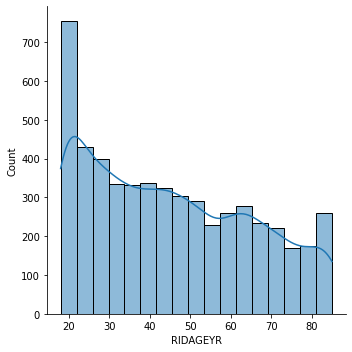

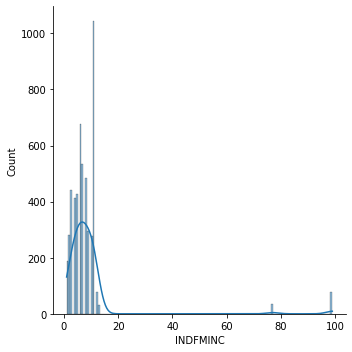

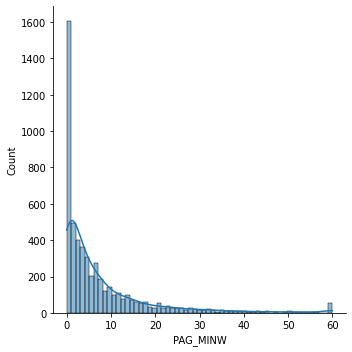

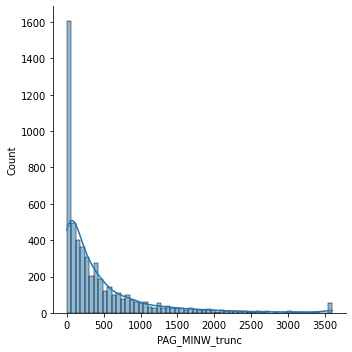

In [ ]:
sns.displot(db2, x='RIDAGEYR', kde=True)
sns.displot(db2, x='INDFMINC', kde=True)
sns.displot(db2, x='PAG_MINW', kde=True)
sns.displot(db2, x='PAG_MINW_trunc', kde=True)

##Com o objetivo de deixar o gráfico menos assimétrico, criou-se um gráfico em log dos valores de 'PAG_MINW'

In [ ]:
db2['PAG_MINW_log'] = np.log(db2['PAG_MINW']+1)

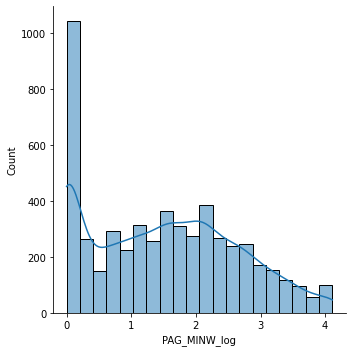

In [ ]:
sns.displot(db2, x='PAG_MINW_log', kde=True)

##Nota-se uma melhora na dstribuição dos valores.

## Nesse passo verifca-se a frequência dos valores nas variáveis qualitativas...

In [ ]:
db2[var_quali].agg('value_counts').round(0)

RIAGENDR  RIDRETH1  DMDEDUC  ADHERENCE  phq_grp2
1         3         5.0      3.0        0.0         171
                    4.0      3.0        0.0         161
2         3         5.0      3.0        0.0         153
1         3         3.0      3.0        0.0         137
2         3         4.0      1.0        0.0         130
                                                   ... 
          1         3.0      2.0        2.0           1
                    2.0      2.0        2.0           1
1         2         1.0      1.0        1.0           1
                             2.0        0.0           1
2         4         5.0      3.0        2.0           1
Length: 297, dtype: int64

##Algumas proporções também podem ser observadas

In [ ]:
# Proporções
db2[var_quali].agg(pd.Series.value_counts, normalize=True).round(2)

# RIDRETH1 com códigos errados no desafio
# 1	Mexican American	
# 2	Other Hispanic
# 3	Non-Hispanic White	
# 4	Non-Hispanic Black	
# 5	Other Race - Including Multi-Racial

,RIAGENDR,RIDRETH1,DMDEDUC,ADHERENCE,phq_grp2
0.0,NaN,NaN,NaN,NaN,0.84
1.0,0.48,0.21,0.12,0.43,0.10
2.0,0.52,0.07,0.18,0.16,0.06
3.0,NaN,0.47,0.25,0.41,NaN
4.0,NaN,0.24,0.28,NaN,NaN
5.0,NaN,NaN,0.18,NaN,NaN


## Apresentação de algumas análises em gráficos

## Primeiro, recomenda-se a construção de uma função, ela terá a tarefa de criar os gráficos a partir de informações passadas pelo cientista.

In [ ]:
# Função para construir gráfico de barras

def grafico_barras_prop(data, variable, values, label):
    (data[[variable]]
     .replace(values, label)
     .value_counts(normalize=True, sort = False)
     .rename("Proportion")
     .reset_index()
     .pipe((sns.barplot, "data"), x=variable, y="Proportion", order = label))
    plt.ylim(0,1)
    plt.show()

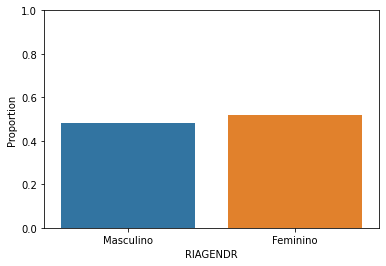

In [ ]:
grafico_barras_prop(db2, variable = "RIAGENDR", values = [1,2], label = ["Masculino", "Feminino"])

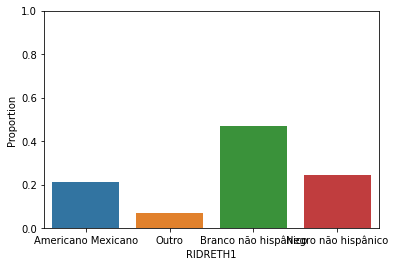

In [ ]:
grafico_barras_prop(db2, 
                    variable = "RIDRETH1", 
                    values = [1,2,3,4], 
                    label = ["Americano Mexicano", "Outro", "Branco não hispânico", "Negro não hispânico"])

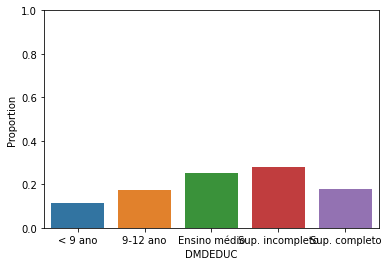

In [ ]:
grafico_barras_prop(db2, 
                    variable = "DMDEDUC", 
                    values = [1,2,3,4,5], 
                    label = ["< 9 ano", "9-12 ano", "Ensino médio", "Sup. incompleto", "Sup. completo"])

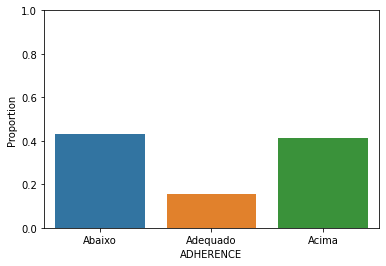

In [ ]:
grafico_barras_prop(db2, 
                    variable = "ADHERENCE", 
                    values = [1,2,3], 
                    label = ["Abaixo", "Adequado", "Acima"])

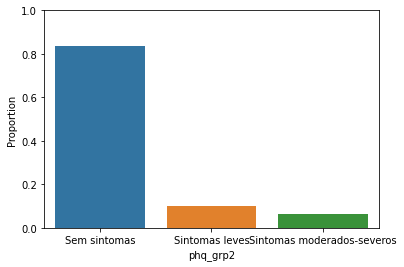

In [ ]:
grafico_barras_prop(db2, 
                    variable = "phq_grp2", 
                    values = [0,1,2], 
                    label = ["Sem sintomas", "Sintomas leves", "Sintomas moderados-severos"])

##No display é exibido todas as variáveis quantitativas e seus números

In [ ]:
from IPython.display import display

for var in var_quant:
    display(db2[['phq_grp2', var]].groupby('phq_grp2').describe().round(2))

RIDAGEYR                                            
            count   mean    std   min   25%   50%   75%   max
phq_grp2                                                     
0.0        4013.0  44.94  19.99  18.0  27.0  42.0  62.0  85.0
1.0         489.0  43.70  19.67  18.0  26.0  41.0  59.0  85.0
2.0         297.0  44.18  17.56  18.0  29.0  45.0  56.0  85.0

INDFMINC                                        
            count  mean    std  min  25%  50%   75%   max
phq_grp2                                                 
0.0        3988.0  8.51  11.13  1.0  5.0  7.0  11.0  99.0
1.0         481.0  9.26  15.94  1.0  4.0  6.0   9.0  99.0
2.0         294.0  6.35   9.29  1.0  3.0  5.0   8.0  99.0

PAG_MINW                                           
            count  mean    std  min   25%   50%    75%   max
phq_grp2                                                    
0.0        4013.0  8.06  11.18  0.0  0.92  3.93  10.32  60.0
1.0         489.0  7.36  11.89  0.0  0.50  3.21   7.99  60.0
2.0         297.0  4.74   9.08  0.0  0.00  1.50   5.39  60.0

HEI2015C1_TOTALVEG                                        
                      count  mean   std  min   25%   50%   75%  max
phq_grp2                                                           
0.0                  3942.0  3.23  1.45  0.0  2.09  3.24  4.84  5.0
1.0                   474.0  3.11  1.53  0.0  1.93  3.15  4.76  5.0
2.0                   288.0  3.05  1.49  0.0  1.92  3.08  4.36  5.0

HEI2015C2_GREEN_AND_BEAN                                       
                            count  mean   std  min  25%   50%   75%  max
phq_grp2                                                                
0.0                        3942.0  1.82  2.14  0.0  0.0  0.14  4.49  5.0
1.0                         474.0  1.77  2.12  0.0  0.0  0.11  4.21  5.0
2.0                         288.0  1.55  2.07  0.0  0.0  0.00  3.61  5.0

HEI2015C3_TOTALFRUIT                                        
                        count  mean   std  min   25%   50%   75%  max
phq_grp2                                                             
0.0                    3942.0  2.53  1.95  0.0  0.47  2.39  5.00  5.0
1.0                     474.0  2.31  1.90  0.0  0.41  2.00  4.36  5.0
2.0                     288.0  2.23  1.97  0.0  0.08  1.96  4.32  5.0

HEI2015C4_WHOLEFRUIT                                       
                        count  mean   std  min  25%   50%   75%  max
phq_grp2                                                            
0.0                    3942.0  2.40  2.17  0.0  0.0  2.18  5.00  5.0
1.0                     474.0  2.19  2.16  0.0  0.0  1.36  5.00  5.0
2.0                     288.0  2.05  2.12  0.0  0.0  1.18  4.89  5.0

HEI2015C5_WHOLEGRAIN                                       
                        count  mean   std  min  25%   50%   75%  max
phq_grp2                                                            
0.0                    3942.0  1.80  1.93  0.0  0.0  1.06  3.52  5.0
1.0                     474.0  1.66  1.82  0.0  0.0  1.04  3.00  5.0
2.0                     288.0  1.47  1.81  0.0  0.0  0.40  2.91  5.0

HEI2015C6_TOTALDAIRY                                       
                        count  mean   std  min   25%   50%  75%  max
phq_grp2                                                            
0.0                    3942.0  3.78  1.59  0.0  2.64  4.98  5.0  5.0
1.0                     474.0  3.75  1.63  0.0  2.65  4.95  5.0  5.0
2.0                     288.0  3.71  1.60  0.0  2.54  4.66  5.0  5.0

HEI2015C7_TOTPROT                                      
                     count  mean   std  min   25%  50%  75%  max
phq_grp2                                                        
0.0                 3942.0  4.45  0.99  0.0  4.21  5.0  5.0  5.0
1.0                  474.0  4.35  1.08  0.0  3.98  5.0  5.0  5.0
2.0                  288.0  4.35  1.12  0.0  4.00  5.0  5.0  5.0

HEI2015C8_SEAPLANT_PROT                                       
                           count  mean   std  min   25%   50%  75%  max
phq_grp2                                                               
0.0                       3942.0  2.61  2.17  0.0  0.03  2.63  5.0  5.0
1.0                        474.0  2.52  2.14  0.0  0.00  2.44  5.0  5.0
2.0                        288.0  2.30  2.15  0.0  0.00  1.91  5.0  5.0

HEI2015C9_FATTYACID                                         
                       count  mean   std  min   25%   50%   75%   max
phq_grp2                                                             
0.0                   3942.0  4.72  3.24  0.0  2.02  4.43  7.29  10.0
1.0                    474.0  4.73  3.19  0.0  2.08  4.55  7.08  10.0
2.0                    288.0  4.36  3.16  0.0  1.63  4.09  6.76  10.0

HEI2015C10_SODIUM                                         
                     count  mean   std  min   25%   50%   75%   max
phq_grp2                                                           
0.0                 3942.0  4.69  3.40  0.0  1.49  4.76  7.53  10.0
1.0                  474.0  4.96  3.45  0.0  1.75  5.08  7.89  10.0
2.0                  288.0  5.20  3.47  0.0  2.60  5.14  8.43  10.0

HEI2015C11_REFINEDGRAIN                                         
                           count  mean   std  min   25%   50%   75%   max
phq_grp2                                                                 
0.0                       3942.0  5.80  3.46  0.0  2.97  6.19  9.19  10.0
1.0                        474.0  5.74  3.62  0.0  2.76  6.23  9.53  10.0
2.0                        288.0  6.09  3.52  0.0  3.34  6.85  9.58  10.0

HEI2015C12_SFAT                                         
                   count  mean   std  min   25%   50%   75%   max
phq_grp2                                                         
0.0               3942.0  6.05  3.17  0.0  3.70  6.36  8.97  10.0
1.0                474.0  6.04  3.15  0.0  3.63  6.46  8.92  10.0
2.0                288.0  5.78  3.31  0.0  2.92  6.38  8.66  10.0

HEI2015C13_ADDSUG                                         
                     count  mean   std  min   25%   50%   75%   max
phq_grp2                                                           
0.0                 3942.0  6.29  3.29  0.0  3.87  6.93  9.50  10.0
1.0                  474.0  5.93  3.47  0.0  3.08  6.70  9.17  10.0
2.0                  288.0  5.45  3.65  0.0  2.19  5.67  9.16  10.0

HEI2015_TOTAL_SCORE                                                 
                       count   mean    std    min    25%    50%    75%    max
phq_grp2                                                                     
0.0                   3942.0  50.17  12.46  16.06  41.09  49.81  58.42  89.53
1.0                    474.0  49.07  11.66  16.49  40.94  48.39  56.99  81.52
2.0                    288.0  47.59  11.50  21.63  39.11  46.50  55.95  83.30

phq9                                           
           count   mean   std   min   25%   50%   75%   max
phq_grp2                                                   
0.0       4013.0   1.38  1.52   0.0   0.0   1.0   2.0   5.0
1.0        489.0   7.14  1.12   6.0   6.0   7.0   8.0   9.0
2.0        297.0  13.74  3.65  10.0  11.0  13.0  15.0  27.0

## EDA: Análise Bivariada

### A partir desse ponto, a análise será bivariada, ou seja, como uma variável se comporta se comparada com outra.

In [ ]:
# Função para construir o boxplot

def grafico_boxplot_grp(data, variable, label):
  if label == "": label = variable
  sns.boxplot(x="phq_grp2", y=variable, data=data)
  plt.ylabel(label)
  plt.show()


### Observando os gráficos

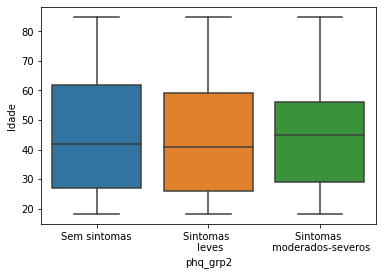

In [ ]:
grafico_boxplot_grp(db2.replace(label_qual),"RIDAGEYR",'Idade')

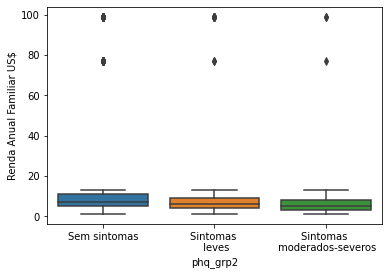

In [ ]:
grafico_boxplot_grp(db2.replace(label_qual),"INDFMINC",'Renda Anual Familiar US$')

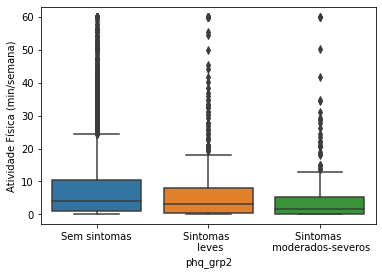

In [ ]:
grafico_boxplot_grp(db2.replace(label_qual),"PAG_MINW",'Atividade Física (min/semana)')

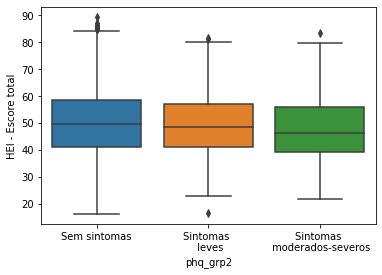

In [ ]:
grafico_boxplot_grp(db2.replace(label_qual),"HEI2015_TOTAL_SCORE",'HEI - Escore total')

##B)Perfil de hábitos saudáveis

Alimentação saudável x Exercícios Físicos

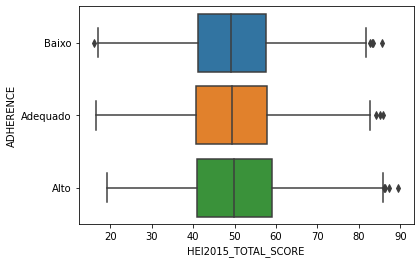

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


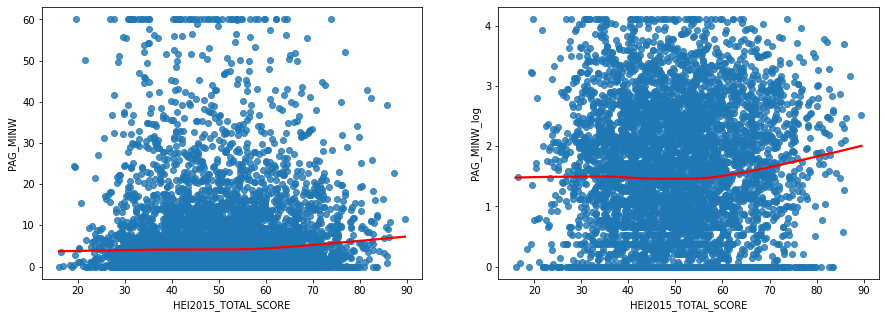

In [ ]:
from IPython.core.pylabtools import figsize
sns.boxplot(y='ADHERENCE',
            x='HEI2015_TOTAL_SCORE',
            orient='h',
            data=db2.replace(label_qual))
plt.show()

fig, ax = plt.subplots(ncols=2, figsize=(15,5))

sns.regplot(x='HEI2015_TOTAL_SCORE',
            y='PAG_MINW',
            lowess=True,
            line_kws={'color': 'red'},
            data = db2,
            ax = ax[0])

sns.regplot(x='HEI2015_TOTAL_SCORE',
            y='PAG_MINW_log',
            lowess=True,
            line_kws={'color': 'red'},
            data = db2,
            ax = ax[1])

Hábitos saudáveis X Gênero

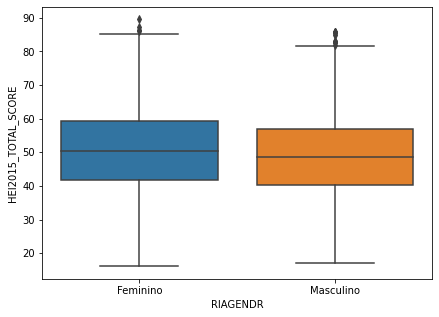

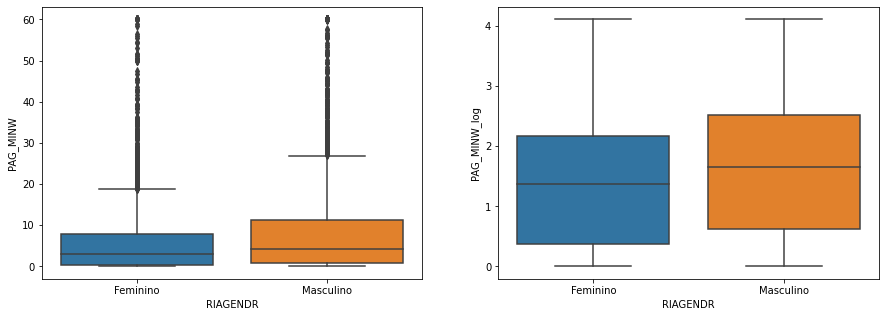

In [ ]:
plt.figure(figsize=(7,5))
sns.boxplot(x = 'RIAGENDR',
            y = 'HEI2015_TOTAL_SCORE',
            data = db2.replace(label_qual))
plt.show()

fig, ax = plt.subplots(ncols=2, figsize=(15, 5))

sns.boxplot(x = 'RIAGENDR',
            y = 'PAG_MINW',
            data = db2.replace(label_qual),
            ax = ax[0])

sns.boxplot(x = 'RIAGENDR',
            y = 'PAG_MINW_log',
            data = db2.replace(label_qual),
            ax = ax[1])
plt.show()


Hábitos saudáveis X Etnias

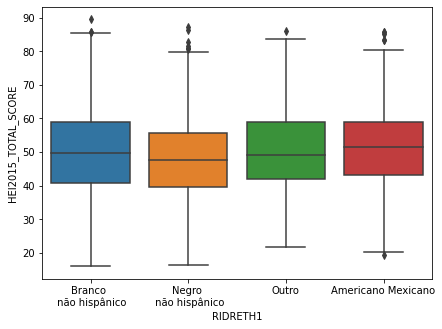

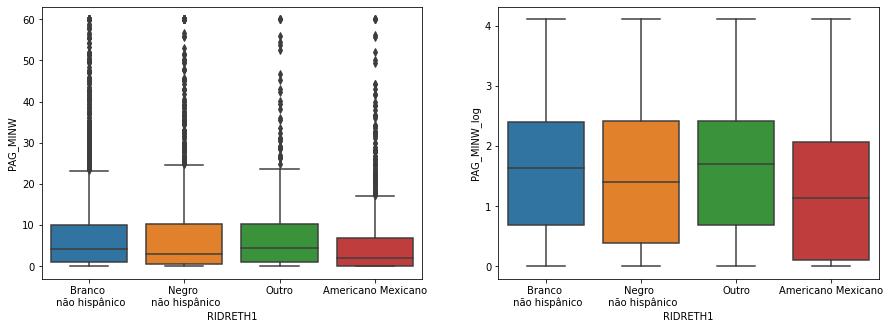

In [ ]:
plt.figure(figsize=(7,5))
sns.boxplot(x = 'RIDRETH1',
            y = 'HEI2015_TOTAL_SCORE',
            data = db2.replace(label_qual))
plt.show()

fig, ax = plt.subplots(ncols=2, figsize=(15, 5))

sns.boxplot(x = 'RIDRETH1',
            y = 'PAG_MINW',
            data = db2.replace(label_qual),
            ax = ax[0])

sns.boxplot(x = 'RIDRETH1',
            y = 'PAG_MINW_log',
            data = db2.replace(label_qual),
            ax = ax[1])
plt.show()

Hábitos saudáveis X Idade

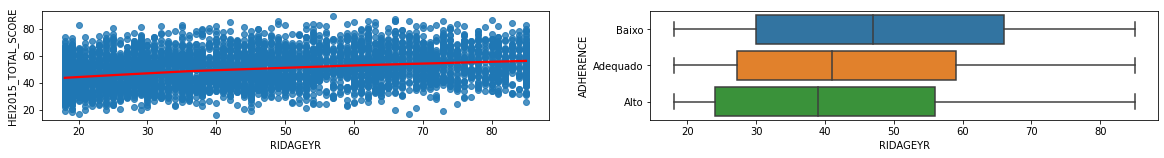

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(20,2))

sns.regplot(x='RIDAGEYR',
            y='HEI2015_TOTAL_SCORE',
            lowess=True,
            line_kws={'color': 'red'},
            data = db2,
            ax = ax[0])

sns.boxplot(x='RIDAGEYR',
            y='ADHERENCE',
            orient = 'h',
            data = db2.replace(label_qual),
            ax = ax[1])

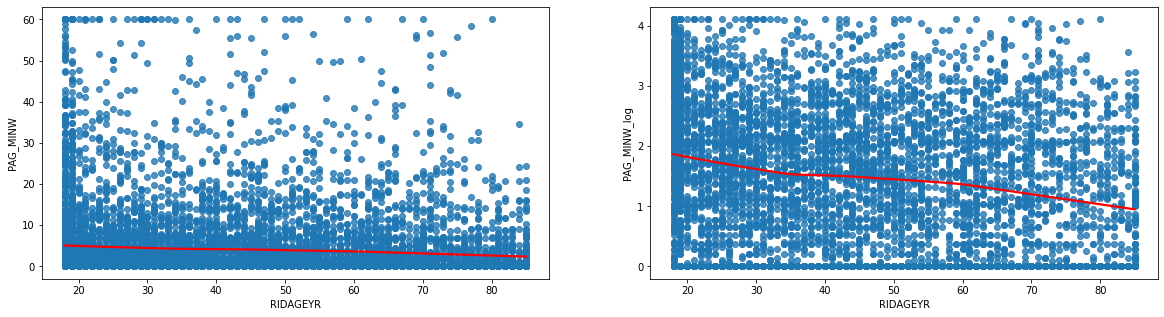

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(20,5))

sns.regplot(x='RIDAGEYR',
            y='PAG_MINW',
            lowess=True,
            line_kws={'color': 'red'},
            data = db2,
            ax = ax[0])

sns.regplot(x='RIDAGEYR',
            y='PAG_MINW_log',
            lowess=True,
            line_kws={'color': 'red'},
            data = db2,
            ax = ax[1])

Hábitos saudávies X Renda

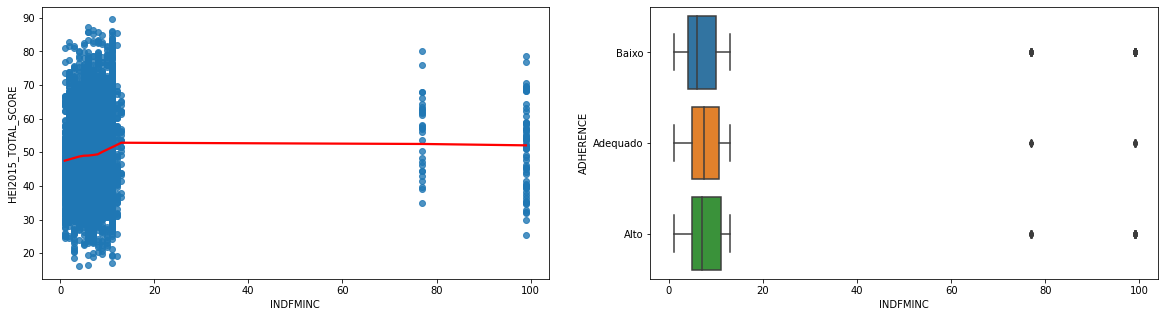

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(20,5))

sns.regplot(x='INDFMINC',
            y='HEI2015_TOTAL_SCORE',
            lowess=True,
            line_kws={'color': 'red'},
            data = db2,
            ax = ax[0])

sns.boxplot(y='ADHERENCE',
            x='INDFMINC',
            orient = 'h',
            data = db2.replace(label_qual),
            ax = ax[1])

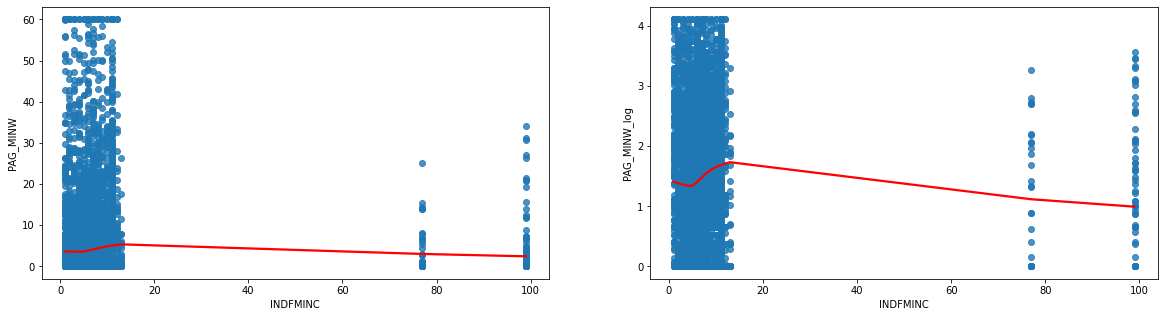

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(20,5))

sns.regplot(x='INDFMINC',
            y='PAG_MINW',
            lowess=True,
            line_kws={'color': 'red'},
            data = db2,
            ax = ax[0])

sns.regplot(x='INDFMINC',
            y='PAG_MINW_log',
            lowess=True,
            line_kws={'color': 'red'},
            data = db2,
            ax = ax[1])

## TESTES DE HIPÓTESES

In [ ]:
db3 = db2[['phq_grp2', 'PAG_MINW_log', 'HEI2015_TOTAL_SCORE']].dropna()

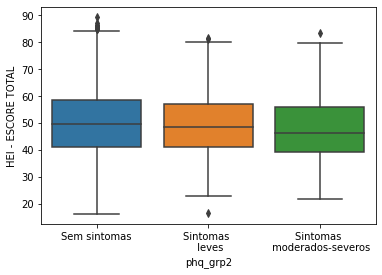

In [ ]:
grafico_boxplot_grp(db2.replace(label_qual), 'HEI2015_TOTAL_SCORE', 'HEI - ESCORE TOTAL')

In [ ]:
from scipy.stats import f_oneway

In [ ]:
stat, p = f_oneway (db3[(db3.phq_grp2 == 0)] ['HEI2015_TOTAL_SCORE'],
                    db3[(db3.phq_grp2 == 1)] ['HEI2015_TOTAL_SCORE'],
                    db3[(db3.phq_grp2 == 2)] ['HEI2015_TOTAL_SCORE'])
print('stat = %.3f, p = %.3f', (stat, p))

stat = %.3f, p = %.3f (7.118997632539152, 0.0008183351070053627)


In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [ ]:
tukey = pairwise_tukeyhsd(db3['HEI2015_TOTAL_SCORE'], db3['phq_grp2'], alpha = 0.05)
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   0.0    1.0  -1.1066 0.1546 -2.5111  0.2978  False
   0.0    2.0  -2.5846 0.0017  -4.348 -0.8211   True
   1.0    2.0  -1.4779 0.2437 -3.6364  0.6805  False
----------------------------------------------------


##Existe diferença no tempo médio de exercícios de acordo com grupos de depressão?

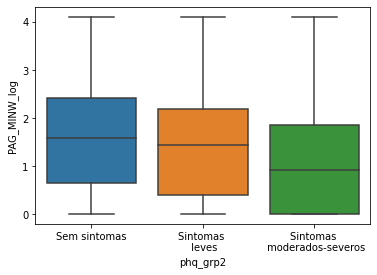

In [ ]:
grafico_boxplot_grp(db2.replace(label_qual), 'PAG_MINW_log', 'PAG_MINW_log')

In [ ]:
from scipy.stats import f_oneway

In [ ]:
stat, p = f_oneway (db3[(db3.phq_grp2 == 0)] ['PAG_MINW_log'],
                    db3[(db3.phq_grp2 == 1)] ['PAG_MINW_log'],
                    db3[(db3.phq_grp2 == 2)] ['PAG_MINW_log'])
print('stat = %.3f, p = %.3f', (stat, p))

stat = %.3f, p = %.3f (29.200935459230646, 2.4907108073131957e-13)


In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [ ]:
tukey = pairwise_tukeyhsd(db3['PAG_MINW_log'], db3['phq_grp2'], alpha = 0.05)
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   0.0    1.0  -0.1398 0.0272 -0.2672 -0.0125   True
   0.0    2.0  -0.5041  0.001  -0.664 -0.3441   True
   1.0    2.0  -0.3642  0.001   -0.56 -0.1685   True
----------------------------------------------------
